# Decision Tree

## Q: Why?
* The final model is so easy to understand by practitioners
* Decision tree also provides the foundation for more advanced ensemble methods such as bagging, random forest and gradient boosting
* Decision trees implicitly performs variable screening or feature selection
* Decision trees requires relatively less effort from user for data preparation 
    * no scaling required
    * no outlier treatment required
    * Missing value treatment: some implementatin does, but Scikit Learn does not handles it. You can use Imputer
* Cost of decision tree is logarithmic in the number of data points used to train the tree
* handles both numerical and categorical
* white box

## Q: Why not?
* Can lead to overfitting
* Unstable , small changes in data will lead to completely different tree being generated.This problem is mitigated using decision trees with ensemble
* Practical decision trees are built using greedy algorithm so there is low chances of arriving at global optima. But this issue is handled by using ensemble
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
* decision tree creates biased trees if some classes dominate so it is good to use balanced classes

**NOTE**
* Decision trees are bad for XOR data sets where you need curve boundaries instead of rectangular ones. But there is a way to handl this by inputting PCA components into decision trees instead of direct variables


## Q: how to handle imbalanced data ?

**1. Undersample**  
* Undersample: balance class distribution by randomly eliminating majority class examples.  This is done until the majority and minority class instances are balanced out. 
    * We might loose some information is the problem here

**2. Over Sample**  
* Oversample: Increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.
    * We might overfit is the issue here

**3. Cluster based oversampling**  
* Cluster based oversampling: In this case, the K-means clustering algorithm is independently applied to minority and majority class instances. This is to identify clusters in the dataset. Subsequently, each cluster is oversampled such that all clusters of the same class have an equal number of instances and all classes have the same size.  
    * We might again have overfitting issue here

**4. SMOTE : Synthetic Minority Oversampling Technique**  
* This technique is followed to avoid overfitting
* The feature space for the minority class for which we want to oversample could be beak length, wingspan, and weight (all continuous). To then oversample, take a sample from the dataset, and consider its k nearest neighbors (in feature space). To create a synthetic data point, take the vector between one of those k neighbors, and the current data point. Multiply this vector by a random number x which lies between 0, and 1. Add this to the current data point to create the new, synthetic data point.  
* Disadvantages: Not effective for high dimension and While generating synthetic examples SMOTE does not take into consideration neighboring examples from other classes. This can result in increase in overlapping of classes and can introduce additional noise  

**5. MSMOTE : Modeified Synthetic Minority Oversampling Technique**
* It is a modified version of SMOTE. SMOTE does not consider the underlying distribution of the minority class and latent noises in the dataset. To improve the performance of SMOTE a modified method MSMOTE is used.
* This algorithm classifies the samples of minority classes into 3 distinct groups – Security/Safe samples, Border samples, and latent nose samples. This is done by calculating the distances among samples of the minority class and samples of the training data.
* Security samples are those data points which can improve the performance of a classifier. While on the other hand, noise are the data points which can reduce the performance of the classifier.  The ones which are difficult to categorize into any of the two are classified as border samples.

**6. Bagging**  
* The conventional bagging algorithm involves generating ‘n’ different bootstrap training samples with replacement. And training the algorithm on each bootstrapped algorithm separately and then aggregating the predictions at the end.
* Advantage:
    * Improves stability & accuracy of machine learning algorithms
    * Reduces variance
    * Overcomes overfitting
    * Improved misclassification rate of the bagged classifier
    * In noisy data environments bagging outperforms boosting  
* Disadvantages:
    * Bagging works only if the base classifiers are not bad to begin with. Bagging bad classifiers can further degrade performance
    
**7. Boosting- Taking adaboost as an example**  
* Ada Boost is the first original boosting technique which creates a highly accurate prediction rule by combining many weak and inaccurate rules.  Each classifier is serially trained with the goal of correctly classifying examples in every round that were incorrectly classified in the previous round.
* For a learned classifier to make strong predictions it should follow the following three conditions:
    * The rules should be simple
    * Classifier should have been trained on sufficient number of training examples
    * The Classifier should have low training error for the training instances
* Each of the weak hypothesis has an accuracy slightly better than random guessing i.e. Error Term € (t) should be slightly more than ½-β where β >0. This is the fundamental assumption of this boosting algorithm which can produce a final hypothesis with a small error
* This can be applied to any kind of calssification problem. Only issue is it is slightly sensitive to noisy data and outliers
* How it works: 
    * For example in a data set containing 1000 observations out of which 20 are labelled fraudulent. Equal weights W1 are assigned to all observations and the base classifier accurately classifies 400 observations.
    * Weight of each of the 600 misclassified observations is increased to w2 and weight of each of the correctly classified observations is reduced to w3.
    * In each iteration, these updated weighted observations are fed to the weak classifier to improve its performance. This process continues till the misclassification rate significantly decreases thereby resulting in a strong classifier.


**8. Gradient tree Boosting**  
* In Gradient Boosting many models are trained sequentially. It is a numerical optimization algorithm where each model minimizes the loss function, y = ax+b+e, using the Gradient Descent Method.
* Decision Trees are used as weak learners in Gradient Boosting.
* Difference between Adaboost and Gradient boost: While both Adaboost and Gradient Boosting work on weak learners / classifiers. And try to boost them into a strong learner, there are some fundamental differences in the two methodologies
    * Adaboost either requires the users to specify a set of weak learners  or randomly generates the weak learners before the actual learning process. The weight of each learner is adjusted at every step depending on whether it predicts a sample correctly
    * Gradient Boosting builds the first learner on the training dataset to predict the samples, calculates the loss (Difference between real value and output of the first learner). And use this loss to build an improved learner in the second stage. At every step, the residual of the loss function is calculated using the Gradient Descent Method and the new residual becomes a target variable for the subsequent iteration.
    
**9. XG Boosting**
* XGBoost (Extreme Gradient Boosting) is an advanced and more efficient implementation of Gradient Boosting Algorithm discussed in the previous section.
* It is 10 times faster than the normal Gradient Boosting as it implements parallel processing. It is highly flexible as users can define custom optimization objectives and evaluation criteria, has an inbuilt mechanism to handle missing values.
* Unlike gradient boosting which stops splitting a node as soon as it encounters a negative loss, XG Boost splits up to the maximum depth specified and prunes the tree backward and removes splits beyond which there is an only negative loss.

## Q : What is the cost function of the decision tree
* Cost Function: 

    * Classification Problems: Gini Coefficients Or Information Gain Entropy. Gini is preferred becuase less computationally intensive since there is no logarithm to take
        * Gini : $ 1 - \sum_{j=1}^{c} p^2_j$ where c is count of classes and p is probability of each classes
        * Entropy Information Gain :  $ - \sum_{j=1}^{c} p_j log p_j $ where c is count of classes and p is probability of each classes

    * Regression Problems: The cost function that is minimized to choose split points is the sum squared error across all training samples that fall within the rectangle.
        * RMSE $ \sqrt{ \frac{\sum_{i=1}^{N} (x_i - \bar{x})^2}{N}} $

## Q: Step by step Algorithm logic of Decision tree:

1. For every value in the independent variable, the data is divided into two groups and gini index is calculated.
2. The value at which we get a split with least gini index is chosen for the first split of the data set
3. Step 1 and 2 is repeated for each sub splits recursively
4. Step 3 keeps happening until we hit the terminal condition for a node, which might be one of the below 
    * Minimum data points 
    * Maximum tree depth
    * There is no records on the one side of the split

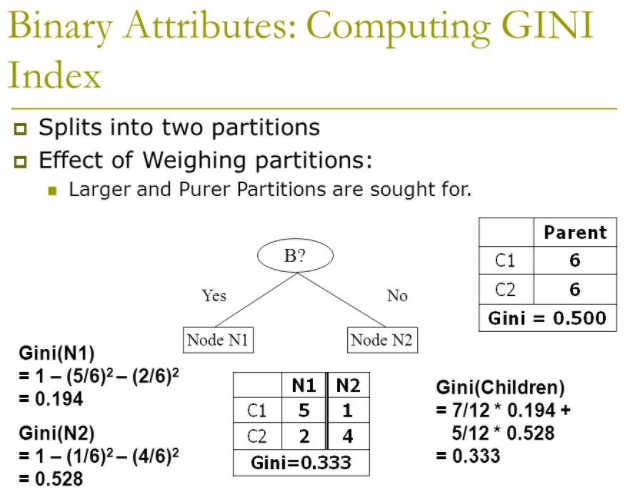

In [127]:
from IPython.display import Image
Image("C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\JobSearch\\GitHubRepos\\MachineLearning_Python-R-Tableau\\imagesanddata_backupfiles\\gini_index.png", 
      width = 400)

In [38]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

# Calculate the Gini index for a split dataset

def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

# Select the best split point for a dataset
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)

# Build a decision tree
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

# Print a decision tree
def print_tree(node, depth=0):
    if isinstance(node, dict):
        print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    else:
        print('%s[%s]' % ((depth*' ', node)))

dataset = [[2.771244718,1.784783929,0],
    [1.728571309,1.169761413,0],
    [3.678319846,2.81281357,0],
    [3.961043357,2.61995032,0],
    [2.999208922,2.209014212,0],
    [7.497545867,3.162953546,1],
    [9.00220326,3.339047188,1],
    [7.444542326,0.476683375,1],
    [10.12493903,3.234550982,1],
    [6.642287351,3.319983761,1]]
tree = build_tree(dataset, 1, 1)
print_tree(tree) 

[X1 < 6.642]
 [0]
 [1]


## Q: Scikit learn implementation of decision tree

In [125]:
from sklearn import tree
import pandas as pd
import seaborn as sns
import numpy as np
iris = sns.load_dataset("iris")
iris['setosa_fl'] = np.where(iris['species'] == 'setosa',1,0)
X = iris.iloc[:,:-4]
y = iris.iloc[:,iris.shape[1]-1]


clf = tree.DecisionTreeClassifier(criterion='gini', max_depth = 3, min_samples_leaf = 3)
clf = clf.fit(X,y)

print(X.head())

print(clf.feature_importances_)

print(clf.apply(X))

print(clf.predict(X))

print(clf.get_params)

   sepal_length  sepal_width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6
[ 0.77121008  0.22878992]
[ 6  6  6  6  6  7  6  6  6  6  7  6  6  6 11 11  7  6 11  6  7  6  6  6  6
  6  6  6  6  6  6  7  6 11  6  6 11  6  6  6  6  3  6  6  6  6  6  6  6  6
  9  9  9  9  9  9  9  4  9  4  3  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  7  9  9  9  9  9  9  9  9  3  9  9  9  9  4  9
  9  9  9  9  9  9  4  9  9 12  9  9  9  9  9  9  9 12  9  9  9  9  9  9  9
  9  9  9  9  9  9 12  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
<bound method BaseEstimator.get_param

In sklearn, the DecisionTreeClassifier can give you probabilities, but you have to use things like max_depth in order to truncate the tree. The probabilities that it returns is P=nA/(nA+nB), that is, the number of observations of class A that have been "captured" by that leaf over the entire number of observations captured by that leaf (during training). But again, you must prune or truncate your decision tree, because otherwise the decision tree grows until n=1 in each leaf and so P=1.

That being said, I think you want to use something like a random forest. In a random forest, multiple decision trees are trained, by using different resamples of your data. In the end, probabilities can be calculated by the proportion of decision trees which vote for each class. This I think is a much more robust approach to estimate probabilities than using individual decision trees.

But random forests are not interpretable, so if interpertability is a requirement, use the decision tree like I mentioned. You can use grid search to maximize the ROC AUC score by changing hyperparameters such as maximum depth to find whatever decision tree gives the most reliable probabilities.

In [119]:
print(clf.predict_proba(X))

[[ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.16666667  0.83333333]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.16666667  0.83333333]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.16666667  0.83333333]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.16666667  0.83333333]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.16666667  0.83333333]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 

In [124]:
import graphviz 
dot_data =tree.export_graphviz(clf, out_file=None) 
dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[0] <= 5.45\\ngini = 0.444\\nsamples = 150\\nvalue = [100, 50]"] ;\n1 [label="X[1] <= 2.8\\ngini = 0.233\\nsamples = 52\\nvalue = [7, 45]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[0] <= 4.95\\ngini = 0.245\\nsamples = 7\\nvalue = [6, 1]"] ;\n1 -> 2 ;\n3 [label="gini = 0.444\\nsamples = 3\\nvalue = [2, 1]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 4\\nvalue = [4, 0]"] ;\n2 -> 4 ;\n5 [label="X[0] <= 5.35\\ngini = 0.043\\nsamples = 45\\nvalue = [1, 44]"] ;\n1 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 39\\nvalue = [0, 39]"] ;\n5 -> 6 ;\n7 [label="gini = 0.278\\nsamples = 6\\nvalue = [1, 5]"] ;\n5 -> 7 ;\n8 [label="X[1] <= 3.45\\ngini = 0.097\\nsamples = 98\\nvalue = [93, 5]"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="gini = 0.0\\nsamples = 90\\nvalue = [90, 0]"] ;\n8 -> 9 ;\n10 [label="X[0] <= 6.5\\ngini = 0.469\\nsamples = 8\\nvalue = [3, 5]"] ;\n8 -> 10 ;\n11 [lab

Take the above out put Above output paste it on notepad++ and find \\n and replace with \r\n. Then paste the result on http://webgraphviz.com/ to get below output

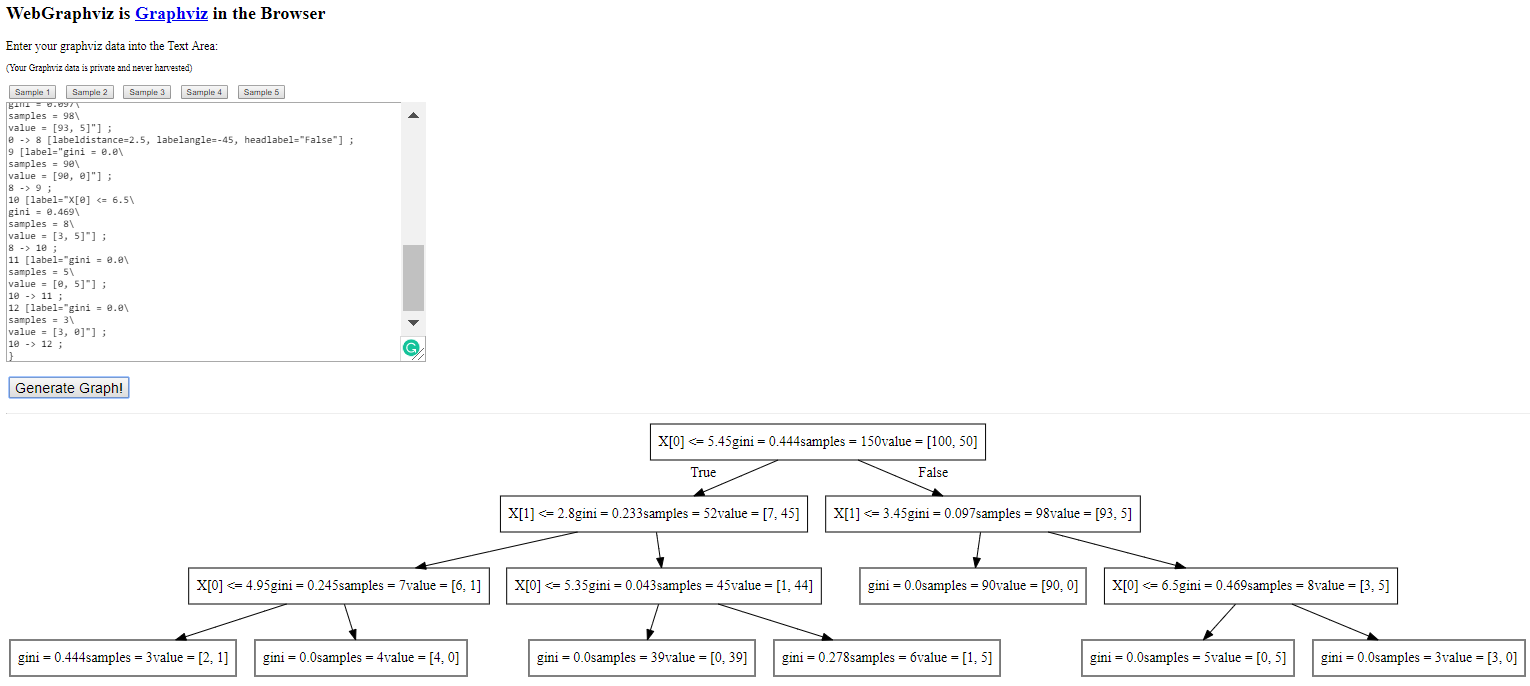

In [130]:
Image("C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\JobSearch\\GitHubRepos\\MachineLearning_Python-R-Tableau\\imagesanddata_backupfiles\\decisiontreegraphviz.png", 
      width = 1000)